In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('CY2012.txt', sep='\t')
df = df[['average_Medicare_allowed_amt', 'average_submitted_chrg_amt']]
df.rename(columns={'average_Medicare_allowed_amt': 'allowed', 'average_submitted_chrg_amt': 'submitted'}, inplace=True)
df = df[pd.notnull(df['allowed'])]
df = df[pd.notnull(df['submitted'])]

/Users/gwulfs/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1164: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
X = df.allowed
Y = df.submitted
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print "r-squared: %.2f, slope: %.2f, intercept: %.2f" % (r_value**2, slope, intercept)

r-squared: 0.57, slope: 2.95, intercept: 14.33


In [4]:
np.random.seed(10)
rows = np.random.choice(df.index.values, 10000, replace=False)
df_sample = df.ix[rows]

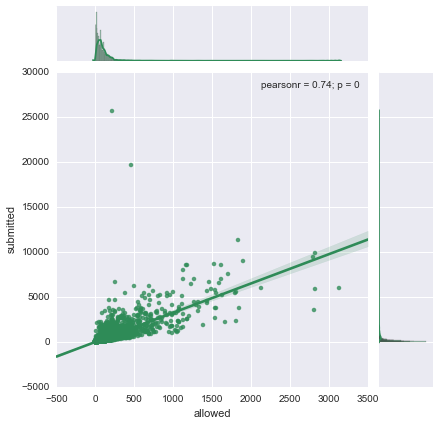

In [5]:
# interesting threshold at ~400 on allowed axis
sns.jointplot("allowed", "submitted", df_sample, kind="reg", color="seagreen")

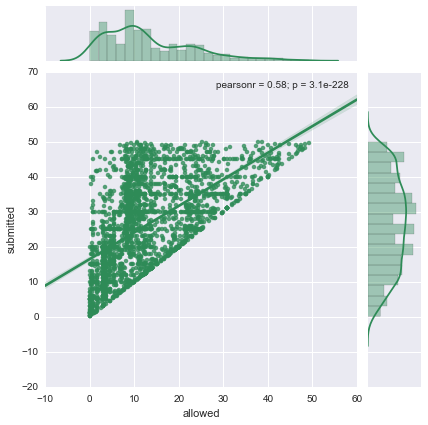

In [6]:
df_sample = df_sample[df_sample.submitted < 50]
sns.jointplot("allowed", "submitted", df_sample, kind="reg", color="seagreen")

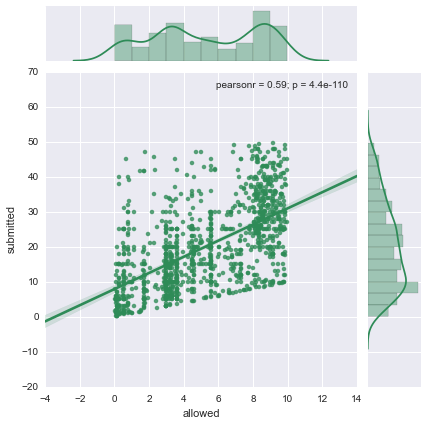

In [7]:
df_sample = df_sample[df_sample.allowed < 10]
sns.jointplot("allowed", "submitted", df_sample, kind="reg", color="seagreen")